# Week3授業前課題2 住宅情報の分析
アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。<br>

<br>

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。<br>

<br>

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

## 【問題1】データセットの取得
`pd.read_csv()`を使用して、変数に格納してください。

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('/Users/tamiyagt/Documents/DIVE INTO CODE/02_Kaggle/house prices/train.csv')
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

>このデータセットは、アイオワ州エイムズ市にある物件情報を1460戸分格納しており、特徴量は79種ある。特徴量は文字データである不動産の種類（住宅用、商業用など）から部屋数や面積などの数値データを含む。

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。<br>

<br>

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

>各特徴量のデータ型を確認するにあたり、pandasの`.info()`モジュールを活用する。出力結果から分かる通り、特徴量にはint64, float64＝数値データとobject＝文字データを含む。

In [34]:
#各特徴量のデータ型を確認
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

>次に、目的変数を確認する。このデータの目的変数は不動産価格（＝SalePrice）であり、列番号は80と確認できる。

In [2]:
#目的変数（＝不動産価格）を表示
print(train['SalePrice'])

#目的変数の列番号を表示
print('SalePriceの列番号＝{}'.format(train.columns.get_loc('SalePrice')))

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
SalePriceの列番号＝80


>最後に数値データの平均値、標準偏差、四分位数を表示する。

In [3]:
#特徴量の平均値、標準偏差、四分位数
print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。<br>

<br>

- 各特徴量の欠損値の有無を確認する。<br>

欠損値の確認には`missingno`というライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。<br>

<br>

- 欠損値が何パーセント含まれるかを確認する。<br>
- 5つ以上欠損値がある特徴量（列）は削除する。<br>
- 欠損値があるサンプル（行）は削除する。<br>


>各特徴量の欠損値数を`missingno`ライブラリの`missingno.matrix`モジュールを利用して可視化する。出力結果から分かる通り、下記特徴量は特に欠損値が多い。<br>
>- LotFrontage
>- Alley
>- FireplaceQu
>- PoolQC
>- Fence
>- MiscFeature<br>
>
><br>
>
>また、欠損値があるサンプルに偏りがあることも分かる。

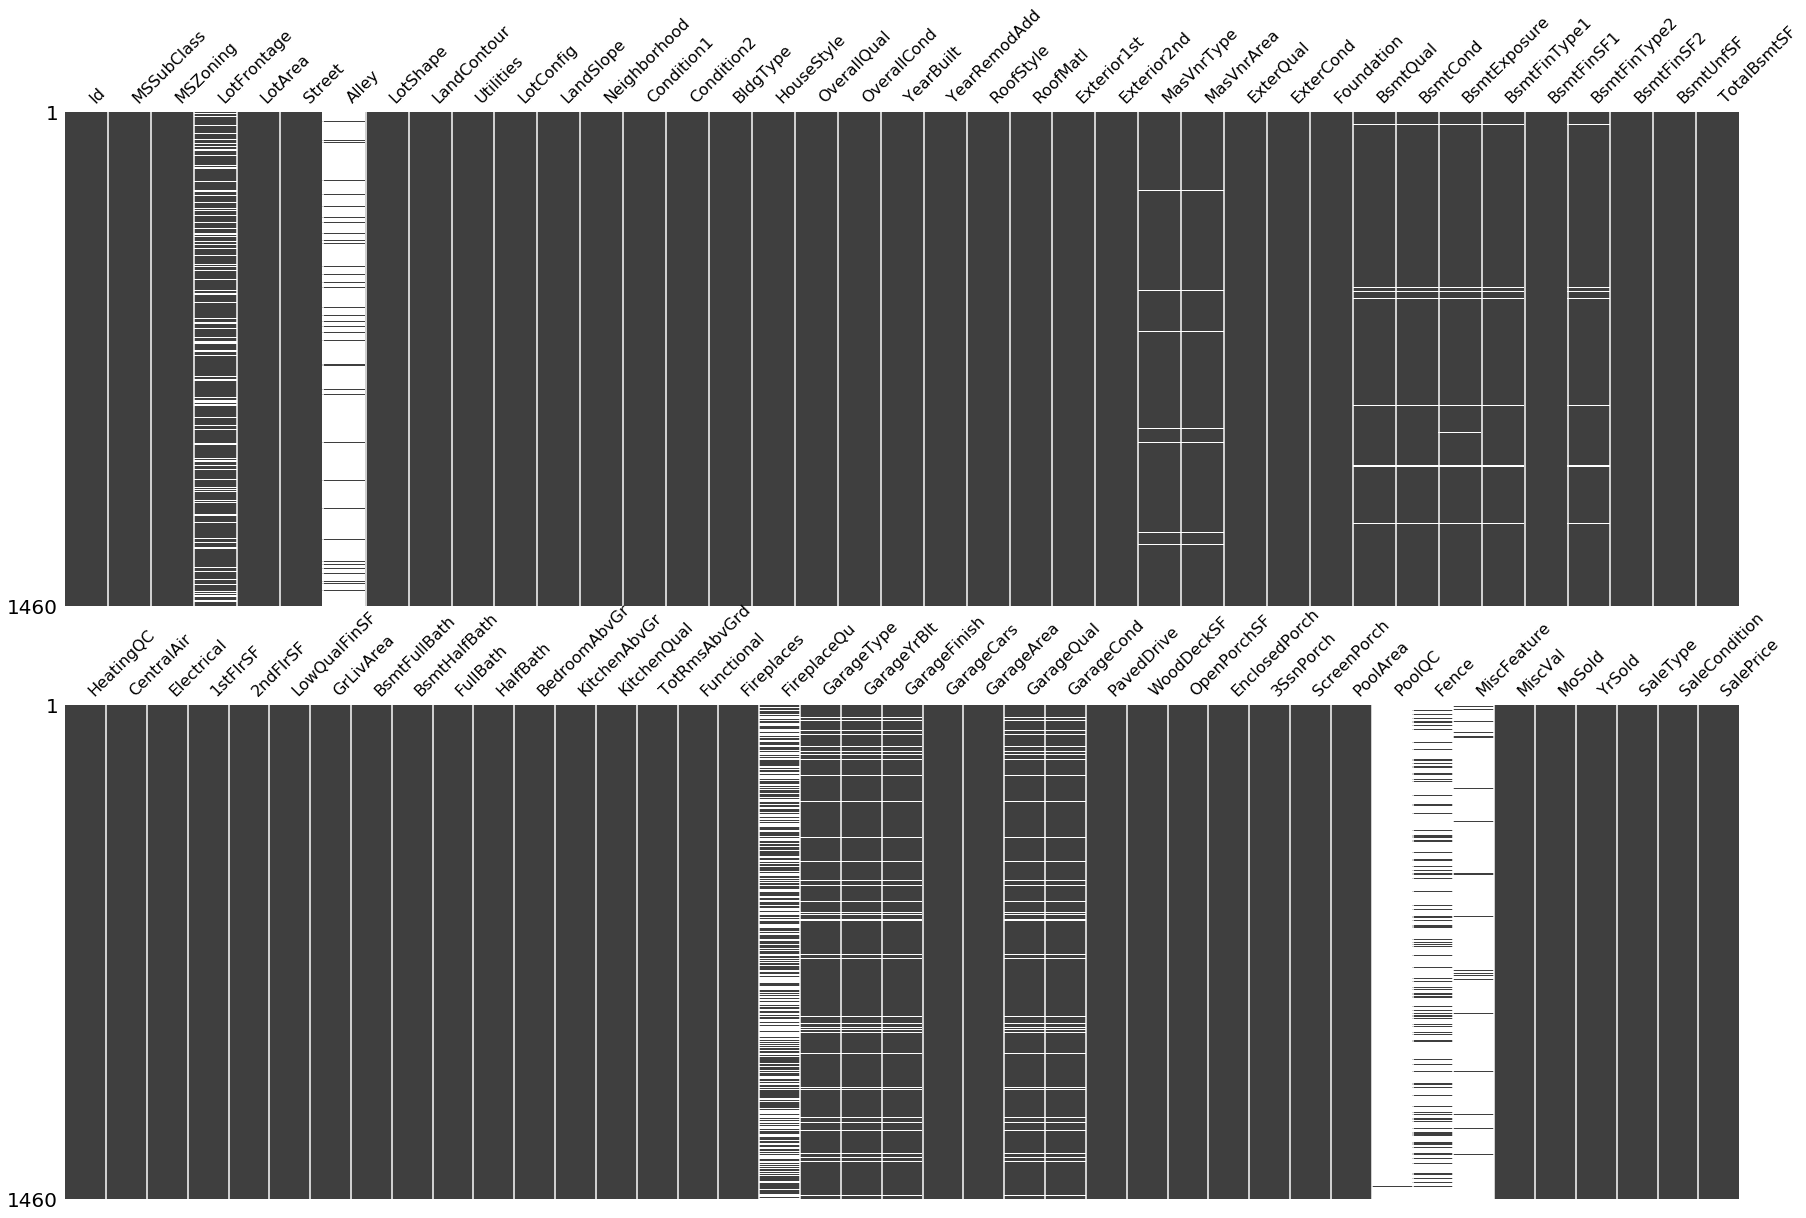

In [39]:
import missingno as msno
%matplotlib inline

#各特徴量の欠損値数を可視化
fig, axs = plt.subplots(2, 1, figsize=(30,20))

msno.matrix(train.iloc[:, 0:39], sparkline=False, ax=axs[0])
msno.matrix(train.iloc[:, 40:], sparkline=False, ax=axs[1])

plt.show()

>欠損率を求め、データを欠損率順に並び替える。

In [5]:
#欠損率の表示
train.isnull().sum()/len(train)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [6]:
#欠損率順に表を並び替え
null_count = train.isnull().sum()
null_rate = null_count / len(train)

null_table = pd.DataFrame({
    'null_couunt': null_count,
    'null_rate': null_rate
})

null_table.sort_values(by='null_rate', ascending=False)

,null_couunt,null_rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


>５つ以上欠損値を含む変数を削除するため、pandasの`.dropna`モジュールを使用して閾値を1456に設定。

In [7]:
#欠損値を5つ以上含む列を削除
train_edit = train.dropna(axis=1, thresh=1456)
train_edit.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF 

>最後に、１つでも欠損値のあるサンプルデータを削除。

In [8]:
#欠損値を含むサンプルを削除
train_edit = train_edit.dropna(axis=0)
train_edit.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF 

## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。<br>

<br>

- 尖度
- 歪度

>尖度と歪度は、ある分布が正規分布と比較した際の逸脱を表す指標である。尖度は分布の尖り具合や裾の重さ表している。より尖ったピークの尖度は正値であり、正規分布より丸く低いピークは負値となる。歪度は分布の左右対称性を測る指標であり、0に近いほど分布は左右対称である。逆に右に歪んだ分布（＝裾が右に長い）は歪度が正値、左に歪んだ分布は負値を示す。
><br>[参考１](https://bellcurve.jp/statistics/course/17950.html)、[参考２](https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/data-concepts/how-skewness-and-kurtosis-affect-your-distribution/)

## 【問題6】分布の確認
- seabornの`sns.distplot()`を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。<br>

<br>

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

尖度は6.51です。
歪度は1.88です。


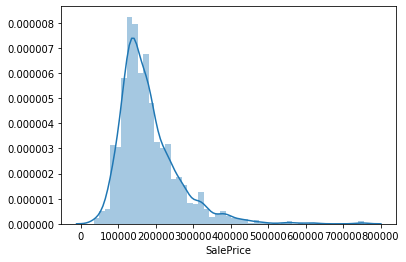

In [9]:
import seaborn as sns
import scipy

sale_price = train['SalePrice']

sns.distplot(sale_price)

print("尖度は{:.2f}です。".format(scipy.stats.kurtosis(sale_price)))
print("歪度は{:.2f}です。".format(scipy.stats.skew(sale_price)))



尖度は0.80です。
歪度は0.12です。


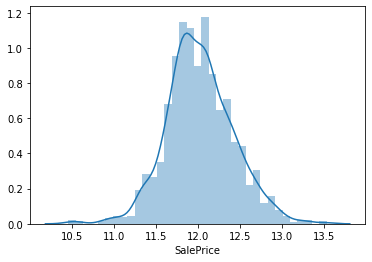

In [10]:
#目的変数を対数変換
sale_price_log = sale_price.apply(np.log)

sns.distplot(sale_price_log)

print("尖度は{:.2f}です。".format(scipy.stats.kurtosis(sale_price_log)))
print("歪度は{:.2f}です。".format(scipy.stats.skew(sale_price_log)))

>対数変換を行った分布は変換前と比べて、より正規分布に近づく。尖度と歪度で表すと、対数変換後は両値とも0に近くなる。

## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。<br>

<br>

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

>欠損値を除外したtrain_editを使って相関係数行列を作成し、その行列のヒートマップを出力。相関係数行列は文字データを参照できないため、数値データのみの相関性が評価される。特徴量の数は３３種（Id, SalePrice含まない）。

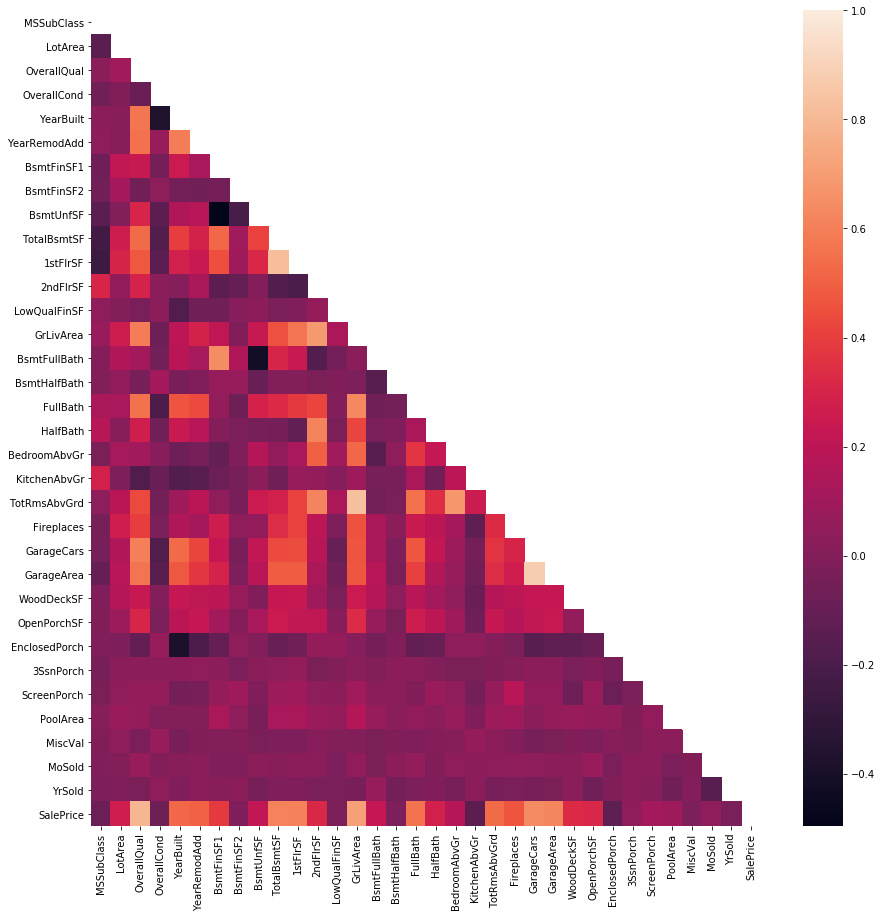

In [40]:
#Id列は除外した配列の相関係数を作成
train_corr = train_edit.iloc[:,1:].corr()

fig, axs = plt.subplots(figsize=(15,15))

#ヒートマップの重複する右上半分をマスク
mask = np.triu(np.ones_like(train_corr, dtype=np.bool))
sns.heatmap(train_corr, mask=mask, ax=axs)

plt.show()

>SalePriceと相関の高い特徴量を選ぶため、相関係数行列を相関係数順に並べ替える。相関係数は0から離れるほど相関の高さを示すため、並べ替えの際に相関係数の絶対値を求める。

In [33]:
#上記相関係数の絶対値を求め、SalePriceと最も相関の高い
#特徴量10個（数値データのみ）を相関係数順に出力
train_corr_abs = np.fabs(train_corr)
saleprice_corr_sort = train_corr_abs.sort_values(by='SalePrice', ascending=False)
print(saleprice_corr_sort['SalePrice'].head(11))


SalePrice       1.000000
OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
YearRemodAdd    0.507430
Name: SalePrice, dtype: float64


>抽出した10個の特徴量の詳細は下記のとおり：
>- OverallQual：住宅に使用された建築材や完成度の質を表す指標（１が最も悪く、１０が最も良い）
>- GrLivArea：地上皆の住居面積（sq ft）
>- GarageCars：ガレージに収容できる車数
>- GarageArea：ガレージ面積（sq ft）
>- TotalBsmtSF：地下面積（sq ft）
>- 1stFlrSF：１階面積（sq ft）
>- FullBath：地上階のバスルーム（浴室＋トイレ）の数
>- TotRmsAbvGrd：地上階の部屋数（浴室やトイレは含まない）
>- YearBuilt：建築年
>- YearRemodAdd：リフォームまたは増築された年（されていなければ建築年と同年）<br>
>
><br>
>
>上記特徴量の中で、物件価格と最も高い相関を示したのはOverallQual（物件の質）で、その他の多くは、物件の住居面積や間取り（部屋数・浴室数）に関する変数である。これらの特徴量が高いほど（＝物件が広い）その物件価格も高い傾向を示している。面積以外では、物件の築年数も関係している。また、広いガレージを持つ物件も価格が高い傾向にある。車社会であるアメリカ地方都市の影響と考えられる。一つ注意すべき点は、これらは物件価格と相関関係があるだけで、因果関係は無いことである。

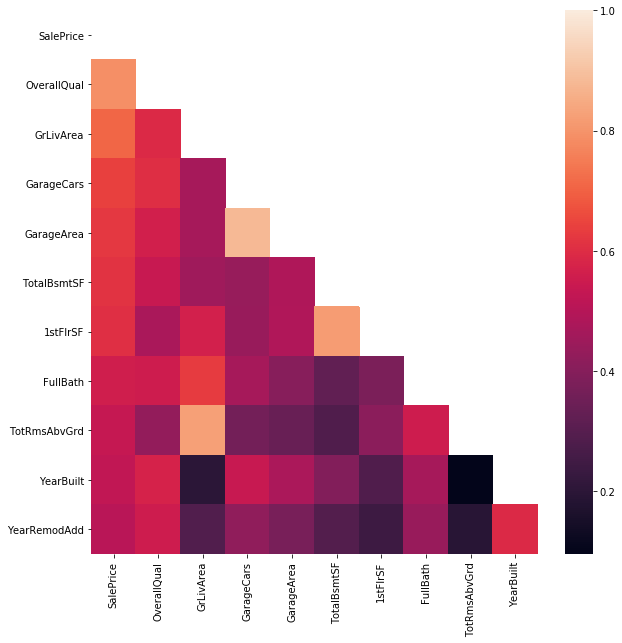

In [32]:
%matplotlib inline

#上記特徴量と目的変数のみの相関係数行列を作成
train_corr_high = train_corr.loc[saleprice_corr_sort.head(11).index,
                                 saleprice_corr_sort.head(10).index]

#ヒートマップを作成
fig, axs = plt.subplots(figsize=(10,10))

#ヒートマップの重複する右上半分をマスク
mask = np.triu(np.ones_like(train_corr_high, dtype=np.bool))
sns.heatmap(train_corr_high, mask=mask, ax=axs)

plt.show()



>下記３つの特徴量の組み合わせが特に高い相関性を示している。<br>
>- GarageArea と GarageCars　（理由：ガレージの広さは車の収容数に直結する）
>- 1stFlrSF と TotalBsmtSF　（理由：１階が広い物件は、多くの場合地下面積も広いと考えられる）
>- TotRmsAbvGrd と GrLivArea　（理由：１階の住居面積が広いと、その分部屋数も多いと考えられる）
